# Preamble

In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from array import array
import pickle
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

In [2]:
##getting the last time step
step = db.get_timestep('cosmo25/%8192')

In [3]:
solar_metal = 0.0134

# Getting SFR for galaxies based on the gas metallicity

# Data

In [4]:
f = open('./Data/stellar_metal_BH.pkl', 'rb')
stellar_metal_BH_data = pickle.load(f)
f.close

f = open('./Data/gas_metal_BH.pkl', 'rb')
gas_metal_BH_data = pickle.load(f)
f.close()

f = open('./Data/stellar_metal.pkl', 'rb')
stellar_metal_data = pickle.load(f)
f.close()

f = open('./Data/gas_metal.pkl', 'rb')
gas_metal_data = pickle.load(f)
f.close()

In [5]:
all_halo_numbers = np.array(gas_metal_data['halo_number'])
halo_with_BH = np.unique(step.calculate_all('host_halo.halo_number()')[0])

BH_halo_ind = np.where(np.in1d(all_halo_numbers, halo_with_BH))
halo_no_BH_ind = np.where(np.in1d(all_halo_numbers, halo_with_BH, invert = True))

In [6]:
with_BH = all_halo_numbers[BH_halo_ind]
no_BH = all_halo_numbers[halo_no_BH_ind]

In [7]:
BH_gas_metal = gas_metal_BH_data['BH_gas_metal']

gas_metal = gas_metal_data['tot_gas_metal']
gas_metal_no_BH = gas_metal[halo_no_BH_ind]

BH_stellar_mass = stellar_metal_BH_data['BH_stellar_mass']

stellar_mass = stellar_metal_data['tot_stellar_mass']
stellar_mass_no_BH = stellar_mass[halo_no_BH_ind]

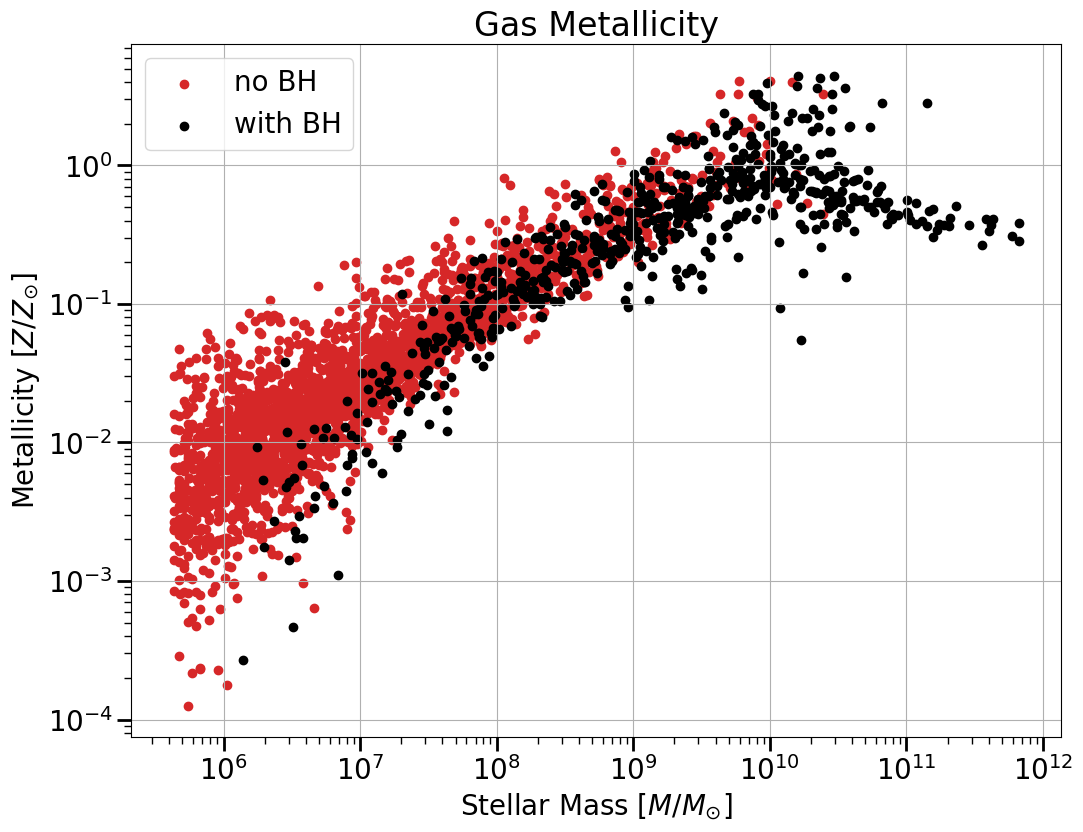

In [22]:
#plotting the stellar metals of halos with BHs
plt.scatter(stellar_mass_no_BH, gas_metal_no_BH/solar_metal, label = 'no BH', color = 'tab:red')
plt.scatter(BH_stellar_mass, BH_gas_metal/solar_metal, color = "black", label = 'with BH')

plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e9, 1e11])
#plt.ylim([1e-2, 1e1])

plt.title('Gas Metallicity')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')
plt.grid()

plt.legend()
#plt.show()
plt.savefig("./Pictures/gas_metal_BH.png", bbox_inches='tight')

## Doing the metal cut

In [9]:
def big_get_halo_ind(arr1, num, i):
    x = []
    if arr1[i] > num:
        x = np.append(x, i)
    return x

In [10]:
def small_get_halo_ind(arr1, num2, i):
    x = []
    if arr1[i] < num2:
        x = np.append(x, i)
    return x

In [11]:
loop1 = np.arange(len(BH_gas_metal))
loop2 = np.arange(len(gas_metal_no_BH))
ind_high = []
ind_low = []
ind_low_BH = []

for i in loop2:
        ind_high = np.append(ind_high, big_get_halo_ind(gas_metal_no_BH/solar_metal, 0.3, i))
        ind_low = np.append(ind_low, small_get_halo_ind(gas_metal_no_BH/solar_metal, 0.3, i))
        
for k in loop1:
        ind_low_BH = np.append(ind_low_BH, small_get_halo_ind(BH_gas_metal/solar_metal, 0.3, k))
        ind_high_BH = np.append(ind_low_BH, big_get_halo_ind(BH_gas_metal/solar_metal, 0.3, k))

In [12]:
ind_high = ind_high.astype(int)
ind_low = ind_low.astype(int)
ind_low_BH = ind_low_BH.astype(int)
ind_high_BH = ind_high_BH.astype(int)

In [13]:
stellar_mass_high = stellar_mass_no_BH[ind_high]
stellar_mass_low = stellar_mass_no_BH[ind_low]
BH_stellar_mass_low = BH_stellar_mass[ind_low_BH]

gas_metal_high = gas_metal_no_BH[ind_high]
gas_metal_low = gas_metal_no_BH[ind_low]
BH_gas_metal_low = BH_gas_metal[ind_low_BH]
BH_gas_metal_high = BH_gas_metal[ind_high_BH]

In [14]:
halo_no_BH_high = no_BH[ind_high]
halo_no_BH_low = no_BH[ind_low]
halo_BH_low = with_BH[ind_low_BH]
halo_BH_high = with_BH[ind_high_BH]

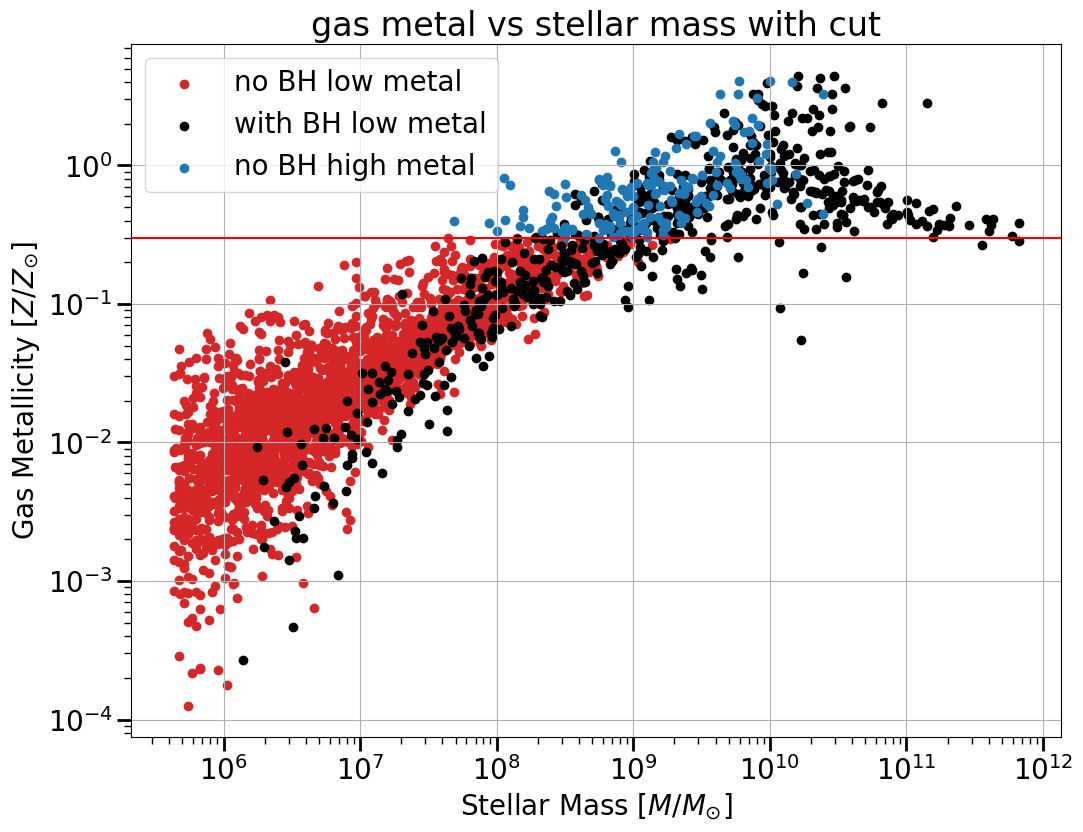

In [34]:
plt.scatter(stellar_mass_low, gas_metal_low/solar_metal, label = 'no BH low metal', color = 'tab:red')
plt.scatter(BH_stellar_mass, BH_gas_metal/solar_metal, color = "black", label = 'with BH low metal')
plt.scatter(stellar_mass_high, gas_metal_high/solar_metal, label = 'no BH high metal', color = 'tab:blue')

plt.axhline(y = 0.3, color = 'red')

plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e7, 1e10])
#plt.ylim([1e-1, 1e0])

plt.title('gas metal vs stellar mass with cut')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Gas Metallicity $[Z/Z_{\odot}]$')
plt.grid()
          
plt.legend()
#plt.show()
plt.savefig("./Pictures/gas_cut.png", bbox_inches='tight')

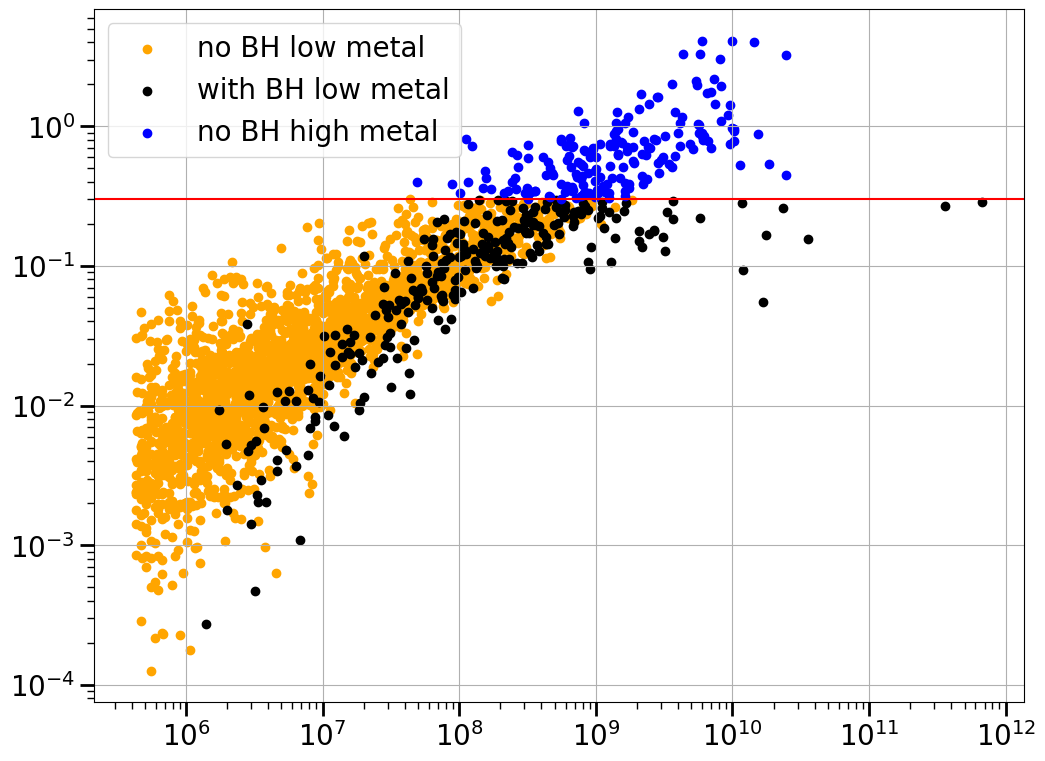

In [16]:
plt.scatter(stellar_mass_low, gas_metal_low/solar_metal, label = 'no BH low metal', color = 'orange')
plt.scatter(BH_stellar_mass_low, BH_gas_metal_low/solar_metal, color = "black", label = 'with BH low metal')
plt.scatter(stellar_mass_high, gas_metal_high/solar_metal, label = 'no BH high metal', color = 'blue')

plt.axhline(y = 0.3, color = 'red')

plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e7, 1e10])
#plt.ylim([1e-1, 1e0])

plt.grid()
plt.legend()
plt.show()

In [17]:
gas_metal_prof_cut = {'no_BH_gas_high': gas_metal_high,
                      'no_BH_gas_low': gas_metal_low,
                      'BH_gas_low': BH_gas_metal_low,
                      'BH_gas_high' : BH_gas_metal_high,
                     'halo_num_no_BH_high' : halo_no_BH_high,
                     'halo_num_no_BH_low' : halo_no_BH_low,
                     'halo_num_BH_low': halo_BH_low,
                     'halo_num_BH_high' : halo_BH_high}

f = open('./Data/gas_metal_prof_cut.pkl', 'wb')
pickle.dump(gas_metal_prof_cut, f)
f.close()

f = open('./Data/gas_metal_prof_cut.pkl', 'rb')
gas_metal_prof_cut_data = pickle.load(f)
f.close()